<a href="https://colab.research.google.com/github/annvorosh/GB/blob/Alg_AD/ALG_L2(Stochastic_GD).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и
обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.


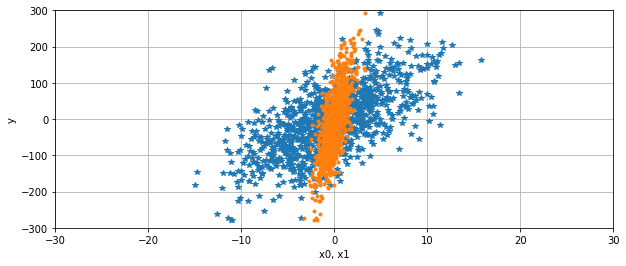

In [ ]:
from sklearn.datasets import make_regression

datar, target, coef = make_regression(n_samples=1000, n_features=2, n_informative=2, n_targets=1, noise=6, coef=True, random_state=2)

datar[:,0] = datar[:,0] * 5

plt.figure(figsize=(10, 4))
plt.xlim((-30, 30))
plt.ylim((-300,300))
plt.xlabel('x0, x1')
plt.ylabel('y')
plt.grid(True)
# plt.show()
plt.plot(datar[:,0], target, '*')
plt.plot(datar[:,1], target, '.')
plt.show()

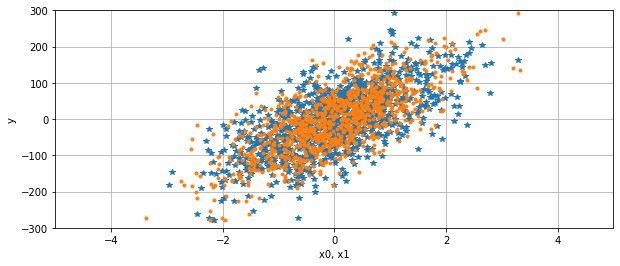

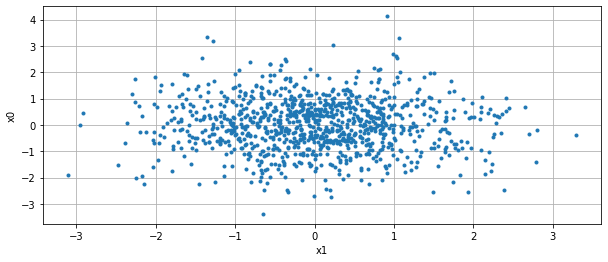

In [ ]:
means = np.mean(datar, axis=0) # среднее всех признаков
stds = np.std(datar, axis=0) # стандартное отклонение всех признаков
# axis=0 - вычисление значений по столбцам (axis=1 - по строкам)

data1 = datar.copy()

for i in range(datar.shape[0]):
  for j in range(datar.shape[1]):
    data1[i][j] = (data1[i][j] - means[j]) / stds[j]

plt.figure(figsize=(10, 4))
plt.xlim((-5, 5))
plt.ylim((-300,300))
plt.xlabel('x0, x1')
plt.ylabel('y')
plt.grid(True)
# plt.show()
plt.plot(data1[:,0], target, '*')
plt.plot(data1[:,1], target, '.')
plt.show()


plt.figure(figsize=(10, 4))
plt.xlabel('x1')
plt.ylabel('x0')
plt.grid(True)
plt.plot(data1[:,0], data1[:,1], '.')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression

datar_test, target_test, _ = make_regression(n_samples=100, n_features=2, n_informative = 2, n_targets = 1,
                                             noise = 1, coef = True, random_state = 2)
datar_test[:,0] = datar_test[:,0]*10
data1_test = datar_test.copy()
# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(datar_test.shape[0]):
    for j in range(datar_test.shape[1]):
        data1_test[i][j] = (data1_test[i][j] - means[j])/stds[j]


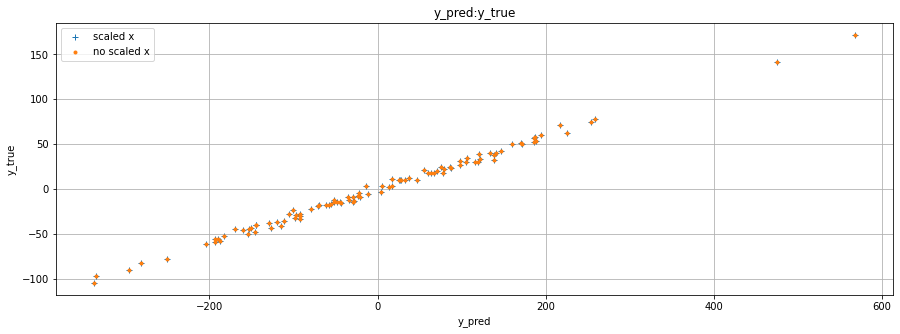

In [ ]:
c_lr1 = LinearRegression().fit(datar, target)
c_lr = LinearRegression().fit(data1, target)

y1 = c_lr1.predict(datar_test[:100,:])
y = c_lr.predict(data1_test[:100,:])

plt.figure(figsize=(15, 5))
plt.plot(y,target_test[:100],'+', label = 'scaled x')
plt.plot(y1,target_test[:100],'.', label = 'no scaled x')
plt.legend()
plt.grid()
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.title('y_pred:y_true')
plt.show()

In [ ]:
def mseerror(X, w, y_pred):   # функция определения среднеквадратичной ошибки
  y = X.dot(w)
  return (sum((y - y_pred)**2)) / len(y)

In [ ]:
# инициализируем начальный вектор весов
w = np.random.randn(2) # Это частный случай

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.001

# максимальное число итераций
max_iter = 0.3*1e5

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0
lamb = 0.001
np.random.seed(1234)

Q = [mseerror(data1, w, target)]
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:

    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data1.shape[0])

    new_w = w - 2 * eta/(0+1) * np.dot(data1[train_ind].T, (np.dot(data1[train_ind], w) - target[train_ind])) #/target.shape[0]

    weight_dist = np.linalg.norm(new_w - w, ord=2)

    w_list.append(new_w.copy())
    errors.append(mseerror(data1, new_w, target))
    Q.append(Q[-1]*(1-lamb)+lamb*(np.dot(data1[train_ind], w) - target[train_ind])**2)
    iter_num += 1
    w = new_w

w_list = np.array(w_list)

print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 2)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 50.16


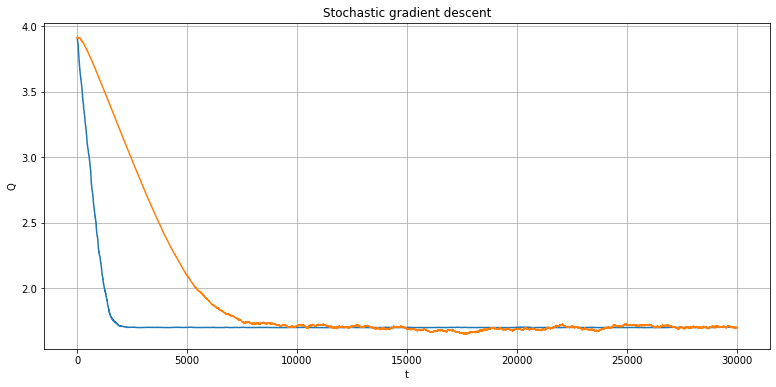

In [ ]:
# Визуализируем изменение Q
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel('t')
plt.ylabel('Q')
plt.grid()

plt.plot(np.log10(errors), label='Градиентный спуск')
plt.plot(np.log10(Q), label='Стохастический градиентный спуск')
plt.show()

Метод градиентного спуска сходится быстрее стохастического при одинаковом шаге
2. Модифицировать решение первого задания путем добавления L2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import Ridge, Lasso, ElasticNet


In [ ]:

# инициализируем начальный вектор весов
w = np.random.randn(2) # Это частный случай

# список векторов весов после каждой итерации
w_list = [w.copy().T]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.15/100

# максимальное число итераций
max_iter = 1e2

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0
lamb = 0.01
q = 100/100
np.random.seed(1234)

target = np.sum(data1 ** 2,1) + 1
target =target.reshape(-1,1)
Q = [mseerror(data1, w, target)[0]]

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:

    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data1.shape[0])

    # производная потерь
    dQ = np.dot(data1[train_ind:train_ind+1,:].T, (np.dot(data1[train_ind:train_ind+1,:], w) - target[train_ind,0]))
    dL2 = 2 * w # производная для штрафа сложности

    new_w = w - 2 * eta * (dQ + q*dL2) #/ target1.shape[0] - нужно ставить небольшое значение скорости обучения

    weight_dist = np.linalg.norm(new_w - w, ord=2)

    w_list.append(new_w.copy())
    errors.append(mseerror(data1, new_w, target)[0])
    Q.append(Q[-1]*(1-lamb)+lamb*(np.dot(data1[train_ind,:], w) - target[train_ind])**2)
    iter_num += 1
    w = new_w

w_list = np.array(w_list)

print(f'В случае использования стохастического градиентного спуска функционал ошибки с учетом L2 -регуляризации составляет {round(errors[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки с учетом L2 -регуляризации составляет 14.4764
